# **DATA SCIENCE COHORT 2 FINAL PROJECT**
## **Capstone Project: Predictive Modelling for COVID-19 Using The Country Wise Dataset**
#### **NAME: UZOMA COLLINS ARINZE**
#### **NO: FE/23/62774891**

In [50]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [51]:
# import the dataset
data = pd.read_csv(r"C:\Users\COLLINS\Desktop\3MTT FINAL PROJECT\datasets\country_wise_latest.csv")

In [52]:
# Shape of dataset
# print(f"The dataset has {data.shape[1]} columns and {data.shape[0]} rows")
print("The number of columns is: ", data.shape[1])
print("The number of rows is: ", data.shape[0])

The number of columns is:  15
The number of rows is:  187


In [53]:
# Overview of the dataset
print(data.info())  # Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [54]:
data.describe() # Summary statistics

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


# Key Insights from the Analysis

## 1. Top 10 Countries by Confirmed Cases
- The **top 10 countries** dominate the total confirmed cases globally, with significant disparities between them.  
- Leading countries such as the **U.S.**, **Brazil**, and **India** show much higher confirmed case counts compared to others.

## 2. Distribution of Death Rates
- Death rates range from **0%** to a maximum of approximately **28.5%**.  
- The majority of countries have a death rate below **5%**, indicating that fatality rates are concentrated within this range.  
- Some **outliers** with higher fatality rates warrant further investigation, potentially related to healthcare system quality or population demographics.

## 3. Distribution of Recovery Rates
- Recovery rates vary widely, with most countries having rates above **60%**.  
- A significant proportion of countries approach **100% recovery rates**, suggesting **effective healthcare responses** in these regions.

## 4. Total Cases by WHO Region
- The **Americas region** accounts for the majority of confirmed cases globally, followed by **Europe** and **South-East Asia**.  
- Regions such as **Africa** and the **Western Pacific** report relatively lower confirmed case counts, possibly due to lower transmission rates or underreporting.


### General Observations

- The dataset highlights stark contrasts in COVID-19 impacts across regions and countries.  
- Higher case and death rates are often concentrated in regions with large populations and dense urban centers (e.g., Americas and Europe).  
- Active cases remain substantial, suggesting the ongoing need for public health measures and vaccinations in many regions.  
- The rate of weekly increase in cases provides insight into countries still experiencing significant outbreaks.  

In [60]:
# Drop non-numeric columns for correlation computation
numeric_data = data.select_dtypes(include=["float64", "int64"])
correlation_matrix_fixed = numeric_data.corr()


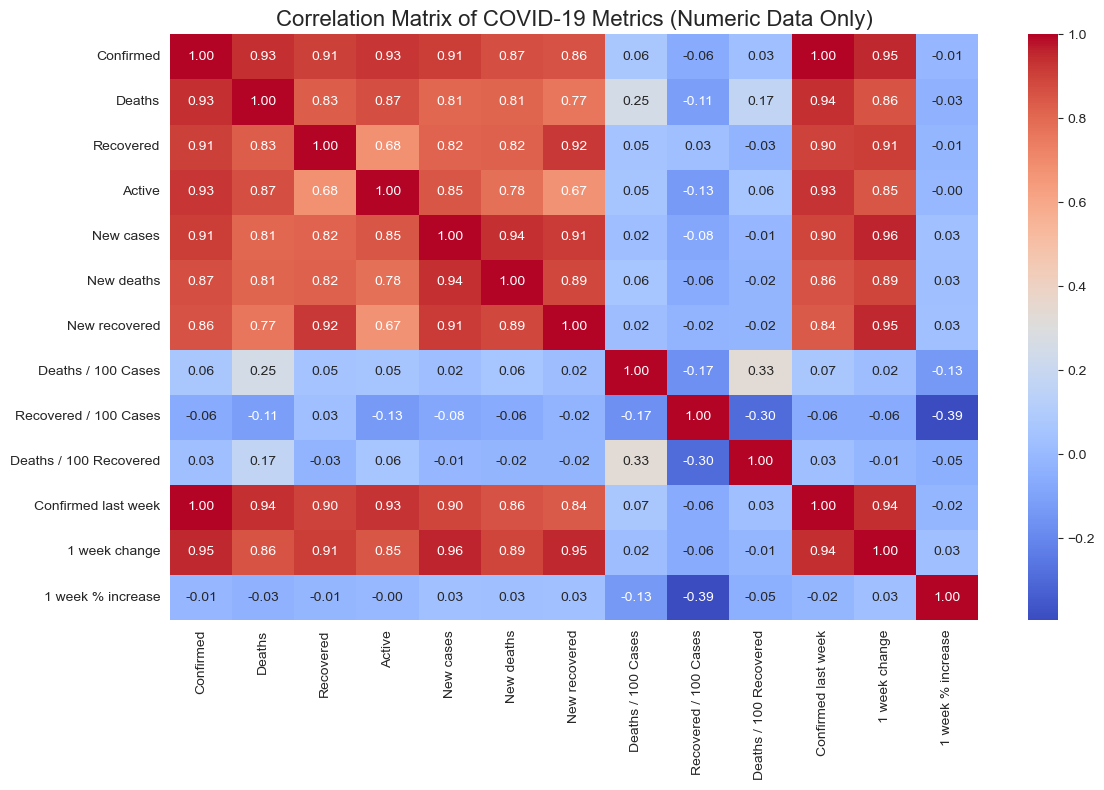

In [61]:

# Replot the heatmap with fixed data
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_fixed, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of COVID-19 Metrics (Numeric Data Only)", fontsize=16)
plt.tight_layout()
plt.show()

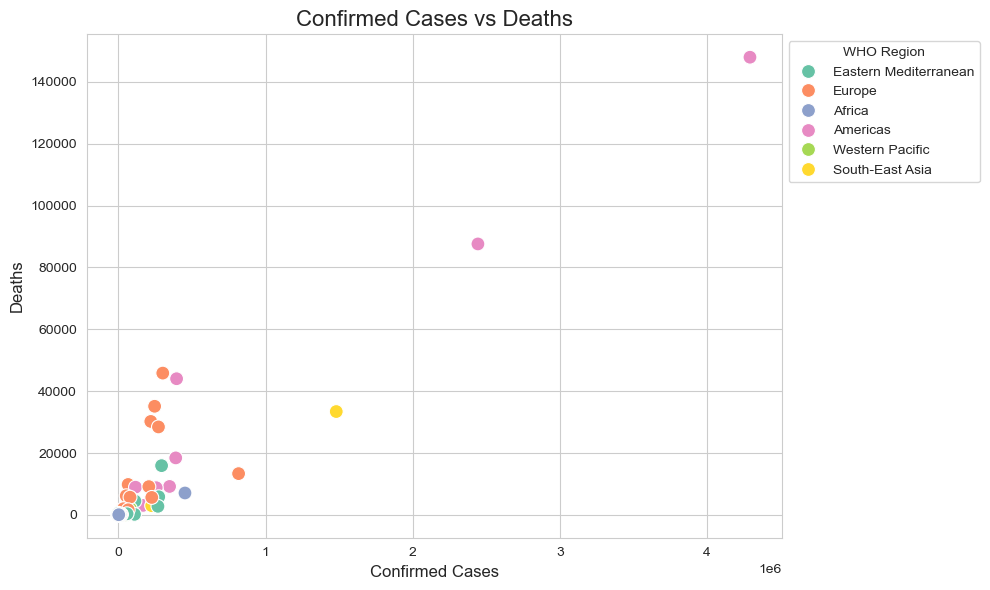

In [56]:

correlation_matrix_fixed

# Scatter plot: Confirmed vs Deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Confirmed", y="Deaths", data=data, hue="WHO Region", palette="Set2", s=100)
plt.title("Confirmed Cases vs Deaths", fontsize=16)
plt.xlabel("Confirmed Cases", fontsize=12)
plt.ylabel("Deaths", fontsize=12)
plt.legend(title="WHO Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


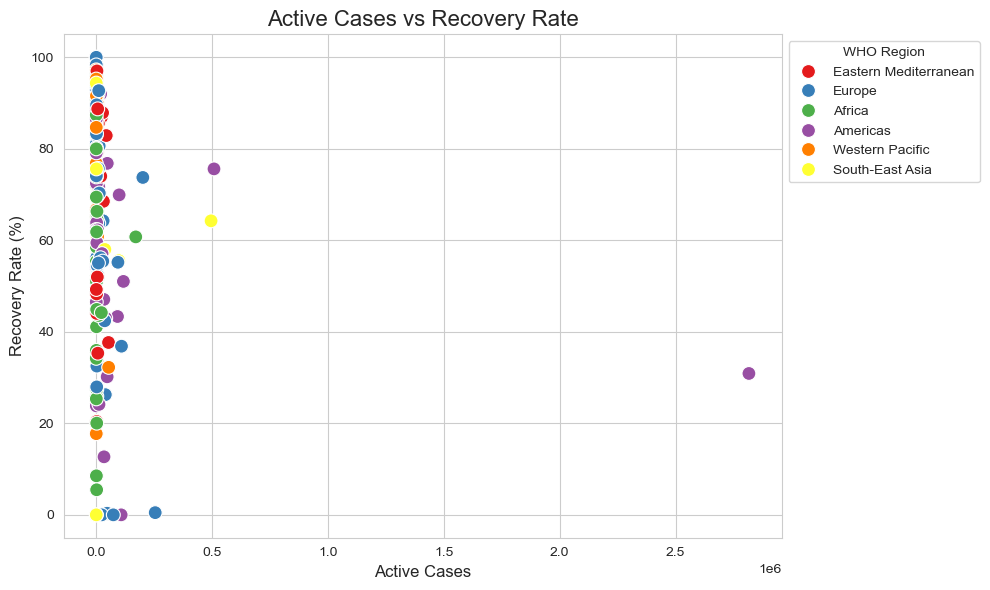

In [57]:

# Scatter plot: Active cases vs Recovery rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Active", y="Recovered / 100 Cases", data=data, hue="WHO Region", palette="Set1", s=100)
plt.title("Active Cases vs Recovery Rate", fontsize=16)
plt.xlabel("Active Cases", fontsize=12)
plt.ylabel("Recovery Rate (%)", fontsize=12)
plt.legend(title="WHO Region", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Insights from Correlation and Plots

## Correlation Analysis
- **Confirmed Cases**:  
  - Strong positive correlation with **Deaths (0.93)** and **Recovered (0.91)**, indicating that higher case counts are associated with both outcomes.  
  - Strong correlation with **Active Cases (0.93)**, showing consistent patterns in countries with high case loads.  
- **Death Rate (Deaths / 100 Cases)**:  
  - Weak or negligible correlation with total confirmed cases, suggesting that other factors (e.g., healthcare quality, population demographics) have a more significant impact on fatality outcomes.

## Scatter Plots
### Confirmed Cases vs Deaths
- The scatterplot reveals a **proportional relationship**, with some outliers where deaths are disproportionately high relative to confirmed cases.  
- **Regions**: The Americas and Europe dominate the higher ends of the spectrum, indicating higher case loads and fatalities.

### Active Cases vs Recovery Rates
- **Trend**: Countries with fewer active cases tend to have higher recovery rates, highlighting the effectiveness of containment and healthcare systems.  
- **Outliers**: Some countries exhibit high active cases with moderate recovery rates, which may point to ongoing outbreaks or challenges in healthcare management.